# Exercise 4.8 :- Grouping Data and Aggregating variables
In this Notebook, we have grouped the Dataframe by a column, then aggregated and applied the Transform function.
Finally we have created a flag based on the aggregated value.

***** We have corrected the prices column - There were 5127 rows with outlier values that was identified in 4.9. Replaced the outlier values with missing value nan in this notebook.

# import the libraries

In [1]:
import pandas as pd
import numpy as np
import os

# Import the Dataframe named ords_prods_merge from the last exercise.

In [2]:
path = r'C:\Users\sorna\Desktop\Data Analysis\Achievement 4'

In [3]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02.Data', 'Prepared Data', 'orders_products_new_variables.pkl'))

In [4]:
df_ords_prods_merge.shape

(32404859, 20)

# Lets clean up the Prices column that had 2 outliers , which was found in the next exercise. Including it here to keep the Dataframe clear before moving to the Visualization process

In [5]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

# The max value in this 99,999 which cannot be correct. Hence we will have to check for records having the outliers are replace them with missing values for time being. The below command can be used to display the rows having the prices value greater than 100. 
We get 5127 rows with outlier values. 

In [6]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_period_of_day
13100147,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,14,5.0,5,0,both,High-range product,Regularly busy,Regularly busy,Most orders
13100148,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,16,4.0,3,1,both,High-range product,Regularly busy,Regularly busy,Most orders
13100149,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,21,13.0,6,0,both,High-range product,Regularly busy,Regularly busy,average orders
13100150,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,8,12.0,3,1,both,High-range product,Busiest day,Busiest day,Most orders
13100151,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,19,30.0,9,0,both,High-range product,Regularly busy,Busiest day,average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,8,4.0,1,0,both,High-range product,Busiest day,Busiest day,Most orders
21786877,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,9,2.0,1,1,both,High-range product,Busiest day,Busiest day,Most orders
21786878,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,15,8.0,25,0,both,High-range product,Regularly busy,slowest day,Most orders
21786879,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,20,4.0,8,0,both,High-range product,Regularly busy,slowest day,average orders


# Replace the outlier values with missing value Nan.

In [7]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [8]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'].isnull()]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest days,busiest_period_of_day
13100147,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,912404,17,prior,12,2,14,5.0,5,0,both,High-range product,Regularly busy,Regularly busy,Most orders
13100148,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,603376,17,prior,22,6,16,4.0,3,1,both,High-range product,Regularly busy,Regularly busy,Most orders
13100149,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,3264360,135,prior,2,2,21,13.0,6,0,both,High-range product,Regularly busy,Regularly busy,average orders
13100150,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,892534,135,prior,3,0,8,12.0,3,1,both,High-range product,Busiest day,Busiest day,Most orders
13100151,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,229704,342,prior,8,1,19,30.0,9,0,both,High-range product,Regularly busy,Busiest day,average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33666,33664,2 % Reduced Fat Milk,84,16,NaN,2249946,204099,prior,29,0,8,4.0,1,0,both,High-range product,Busiest day,Busiest day,Most orders
21786877,33666,33664,2 % Reduced Fat Milk,84,16,NaN,2363282,204099,prior,31,0,9,2.0,1,1,both,High-range product,Busiest day,Busiest day,Most orders
21786878,33666,33664,2 % Reduced Fat Milk,84,16,NaN,3181945,204395,prior,13,3,15,8.0,25,0,both,High-range product,Regularly busy,slowest day,Most orders
21786879,33666,33664,2 % Reduced Fat Milk,84,16,NaN,2486215,205227,prior,7,3,20,4.0,8,0,both,High-range product,Regularly busy,slowest day,average orders


# Find the mean of the order_number for every department_id using the agg() function.

In [9]:
df_ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


Text(0, 0.5, 'Department ID')

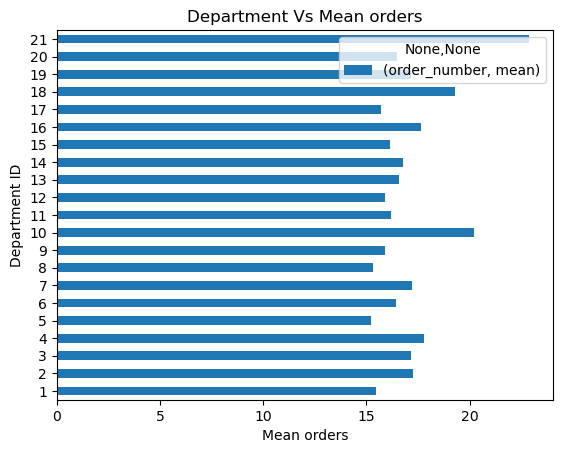

In [11]:
ax = df_ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']}).plot.barh(title = 'Department Vs Mean orders')

# Add axis labels and title
ax.set_xlabel('Mean orders')
ax.set_ylabel('Department ID')
#ax.set_title('Loyal Customers count')


In [12]:
ax.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Department_Vs_orders.png'))

# There is a slight difference in the mean of the order_number after aggregating the order_number value for the entire Dataframe

# Group the Dataframe by the user_id column and find the maximum order_number and create new column named max_order with the max value found using the transform function. 

In [13]:
df_ords_prods_merge['max_order'] = df_ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\sorna\AppData\Local\Temp\ipykernel_4840\136815596.py:1: FutureWarning: The provided callable <function max at 0x000002058DD9AB60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_ords_prods_merge['max_order'] = df_ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)


# The below command alters the setting of head() function to display all the requested rrecords.

In [12]:
pd.options.display.max_rows = None

# Create a new flag column named loyalty_flag to flag the customers based on the value in the max_order column.

In [14]:
df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [15]:
df_ords_prods_merge.loc[(df_ords_prods_merge['max_order'] <= 40) & (df_ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [16]:
df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [17]:
df_ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

# The above values look to high, becos the value_counts will count all the occurance of the user_id for all the orders. Ex:- if a user_id has done 10 orders, the id will appear 10 times in the dataframe and value_count will count all the 10 occurences. Hence we will have to count the unique user_id in each category.

In [17]:
print(df_ords_prods_merge['loyalty_flag'].value_counts(dropna=False))

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64


In [18]:
df_ords_prods_merge.groupby(['loyalty_flag']).user_id.nunique()

loyalty_flag
Loyal customer       17017
New customer        112328
Regular customer     76864
Name: user_id, dtype: int64

# Find the mean, min and max value for the price of the products purchased by the customers and group them by the loyalty flag. This is used to check which customers have purchased more. 

In [19]:
df_ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773575  1.0  25.0
New customer      7.801206  1.0  25.0
Regular customer  7.798262  1.0  25.0

# Group the customers by the loyalty flag and create a new column named mean_price with the mean value of the price of the products purchased by the customers.  Using the mean_price, we can flag the customers as low and high spenders.

In [20]:
df_ords_prods_merge['mean_price'] = df_ords_prods_merge.groupby('user_id')['prices'].transform('mean')

In [21]:
df_ords_prods_merge.loc[df_ords_prods_merge['mean_price'] < 10, 'Spending_flag'] = 'Low Spender'

In [22]:
df_ords_prods_merge.loc[df_ords_prods_merge['mean_price'] >= 10, 'Spending_flag'] = 'High Spender'

# Find the count of the customers in the low and high spender category

In [23]:
df_ords_prods_merge['Spending_flag'].value_counts(dropna=False)

Spending_flag
Low Spender     32285131
High Spender      119728
Name: count, dtype: int64

In [24]:
df_ords_prods_merge.groupby(['Spending_flag']).user_id.nunique()

Spending_flag
High Spender      3389
Low Spender     202820
Name: user_id, dtype: int64

# Find the median of the days_since_prior_orider after grouping the dataframe using the user_id. 

In [25]:
df_ords_prods_merge['order_freq_median'] = df_ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

C:\Users\sorna\AppData\Local\Temp\ipykernel_4840\4124715328.py:1: FutureWarning: The provided callable <function median at 0x000002058DF5EAC0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_ords_prods_merge['order_freq_median'] = df_ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)


# Based on the median we can flag the customers as Frequent, non-frequent and regualar customers.

In [26]:
df_ords_prods_merge.loc[df_ords_prods_merge['order_freq_median'] > 20, 'order_freq_flag'] = 'Non-frequent customer'

In [27]:
df_ords_prods_merge.loc[(df_ords_prods_merge['order_freq_median'] > 10) &  (df_ords_prods_merge['order_freq_median'] <= 20) , 'order_freq_flag'] = 'Regular customer'

In [28]:
df_ords_prods_merge.loc[df_ords_prods_merge['order_freq_median'] <= 10, 'order_freq_flag'] = 'Frequent customer'

In [29]:
df_ords_prods_merge['order_freq_flag'].value_counts(dropna=False)

order_freq_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: count, dtype: int64

In [30]:
df_ords_prods_merge.groupby(['order_freq_flag']).user_id.nunique()

order_freq_flag
Frequent customer        86596
Non-frequent customer    59619
Regular customer         59993
Name: user_id, dtype: int64

# Export the final dataframe to the Prepared Data folder in the local storage.

In [31]:
df_ords_prods_merge.to_pickle(os.path.join(path, '02.Data','Prepared Data', 'orders_products_flags.pkl'))